## Import Library

In [1]:
import pandas as pd
import numpy as np
# from wordcloud import WordCloud, STOPWORDS #install
from sentence_transformers import SentenceTransformer #install
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns #install
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sentence_transformers'

## Load Data

In [2]:
raw_df = pd.read_csv('Food_nutrition_clean.csv', sep=';')
raw_df.head()

,Kode Pangan,Nama Pangan,Energi (Kal),Protein (g),Lemak (g),Karbohidrat (g),Serat (g),Kalsium (g),Besi (g),Garam (g),Vitamin A (g),Vitamin B1 (g),Vitamin B2 (g),Vitamin B3 (g),Vitamin C (g)
0,OL1,Nasi,180,3.0,0.3,39.8,0.2,0.25,0.004,0.01,0.0,0.0005,0.001,0.026,0.0
1,OL2,Tapai beras,99,1.7,0.3,22.4,0.0,0.04,0.000,0.26,0.0,0.0000,0.000,0.000,0.0
2,OL3,Tepung beras mentah,353,7.0,0.5,80.0,2.4,0.05,0.008,0.05,0.0,0.0012,0.001,0.001,0.0
3,OL4,Nasi beras merah,149,2.8,0.4,32.5,0.3,0.06,0.008,0.05,0.0,0.0006,0.000,0.000,0.0
4,OL5,Bihun mentah,348,4.7,0.1,82.1,1.2,0.06,0.018,0.12,0.0,0.0000,0.000,0.000,0.0


## Data Exploration

In [3]:
# data information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kode Pangan      606 non-null    object 
 1   Nama Pangan      606 non-null    object 
 2   Energi (Kal)     606 non-null    int64  
 3   Protein (g)      606 non-null    float64
 4   Lemak (g)        606 non-null    float64
 5   Karbohidrat (g)  606 non-null    float64
 6   Serat (g)        606 non-null    float64
 7   Kalsium (g)      606 non-null    float64
 8   Besi (g)         606 non-null    float64
 9   Garam (g)        606 non-null    float64
 10  Vitamin A (g)    606 non-null    float64
 11  Vitamin B1 (g)   606 non-null    float64
 12  Vitamin B2 (g)   606 non-null    float64
 13  Vitamin B3 (g)   606 non-null    float64
 14  Vitamin C (g)    606 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 71.1+ KB


In [4]:
# shape of the data
raw_df.shape

(606, 15)

In [5]:
# summary of the data with numerical columns
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Energi (Kal),606.0,198.453795,175.108902,8.0,63.0000,132.00000,321.7500,902.000000
Protein (g),606.0,8.345875,9.910492,0.0,1.3000,4.25000,13.5750,68.700000
Lemak (g),606.0,8.030033,16.354134,0.0,0.4000,1.45000,7.3000,100.000000
Karbohidrat (g),606.0,23.771452,26.000748,0.0,4.2000,11.90000,36.4750,94.000000
Serat (g),606.0,2.369802,4.553066,0.0,0.0000,0.90000,2.7000,46.500000
Kalsium (g),606.0,1.174835,2.576962,0.0,0.1600,0.45500,1.3050,38.120000
Besi (g),606.0,0.029840,0.052920,0.0,0.0070,0.01600,0.0330,0.785000
Garam (g),606.0,0.949950,2.017164,0.0,0.0200,0.15000,0.7175,16.640000
Vitamin A (g),606.0,0.000136,0.001439,0.0,0.0000,0.00000,0.0000,0.024242
Vitamin B1 (g),606.0,0.005297,0.081281,0.0,0.0004,0.00100,0.0024,2.000000


In [6]:
# checking columns
raw_df.columns.tolist()

['Kode Pangan',
 'Nama Pangan',
 'Energi (Kal)',
 'Protein (g)',
 'Lemak (g)',
 'Karbohidrat (g)',
 'Serat (g)',
 'Kalsium (g)',
 'Besi (g)',
 'Garam (g)',
 'Vitamin A (g)',
 'Vitamin B1 (g)',
 'Vitamin B2 (g)',
 'Vitamin B3 (g)',
 'Vitamin C (g)']

In [7]:
# check for missing values
raw_df.isnull().sum()

Kode Pangan        0
Nama Pangan        0
Energi (Kal)       0
Protein (g)        0
Lemak (g)          0
Karbohidrat (g)    0
Serat (g)          0
Kalsium (g)        0
Besi (g)           0
Garam (g)          0
Vitamin A (g)      0
Vitamin B1 (g)     0
Vitamin B2 (g)     0
Vitamin B3 (g)     0
Vitamin C (g)      0
dtype: int64

In [8]:
# check for duplicate values
duplicate_count = raw_df.duplicated().sum()
print('Number of duplicates:', duplicate_count)

Number of duplicates: 0


### Exploratory Data Analysis

In [9]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Energi (Kal),606.0,198.453795,175.108902,8.0,63.0000,132.00000,321.7500,902.000000
Protein (g),606.0,8.345875,9.910492,0.0,1.3000,4.25000,13.5750,68.700000
Lemak (g),606.0,8.030033,16.354134,0.0,0.4000,1.45000,7.3000,100.000000
Karbohidrat (g),606.0,23.771452,26.000748,0.0,4.2000,11.90000,36.4750,94.000000
Serat (g),606.0,2.369802,4.553066,0.0,0.0000,0.90000,2.7000,46.500000
Kalsium (g),606.0,1.174835,2.576962,0.0,0.1600,0.45500,1.3050,38.120000
Besi (g),606.0,0.029840,0.052920,0.0,0.0070,0.01600,0.0330,0.785000
Garam (g),606.0,0.949950,2.017164,0.0,0.0200,0.15000,0.7175,16.640000
Vitamin A (g),606.0,0.000136,0.001439,0.0,0.0000,0.00000,0.0000,0.024242
Vitamin B1 (g),606.0,0.005297,0.081281,0.0,0.0004,0.00100,0.0024,2.000000


In [10]:
# drop unnecessary columns
raw_df.drop(['Kode Pangan'], axis=1, inplace=True)
raw_df.head()

,Nama Pangan,Energi (Kal),Protein (g),Lemak (g),Karbohidrat (g),Serat (g),Kalsium (g),Besi (g),Garam (g),Vitamin A (g),Vitamin B1 (g),Vitamin B2 (g),Vitamin B3 (g),Vitamin C (g)
0,Nasi,180,3.0,0.3,39.8,0.2,0.25,0.004,0.01,0.0,0.0005,0.001,0.026,0.0
1,Tapai beras,99,1.7,0.3,22.4,0.0,0.04,0.000,0.26,0.0,0.0000,0.000,0.000,0.0
2,Tepung beras mentah,353,7.0,0.5,80.0,2.4,0.05,0.008,0.05,0.0,0.0012,0.001,0.001,0.0
3,Nasi beras merah,149,2.8,0.4,32.5,0.3,0.06,0.008,0.05,0.0,0.0006,0.000,0.000,0.0
4,Bihun mentah,348,4.7,0.1,82.1,1.2,0.06,0.018,0.12,0.0,0.0000,0.000,0.000,0.0


#### Univariate Analysis

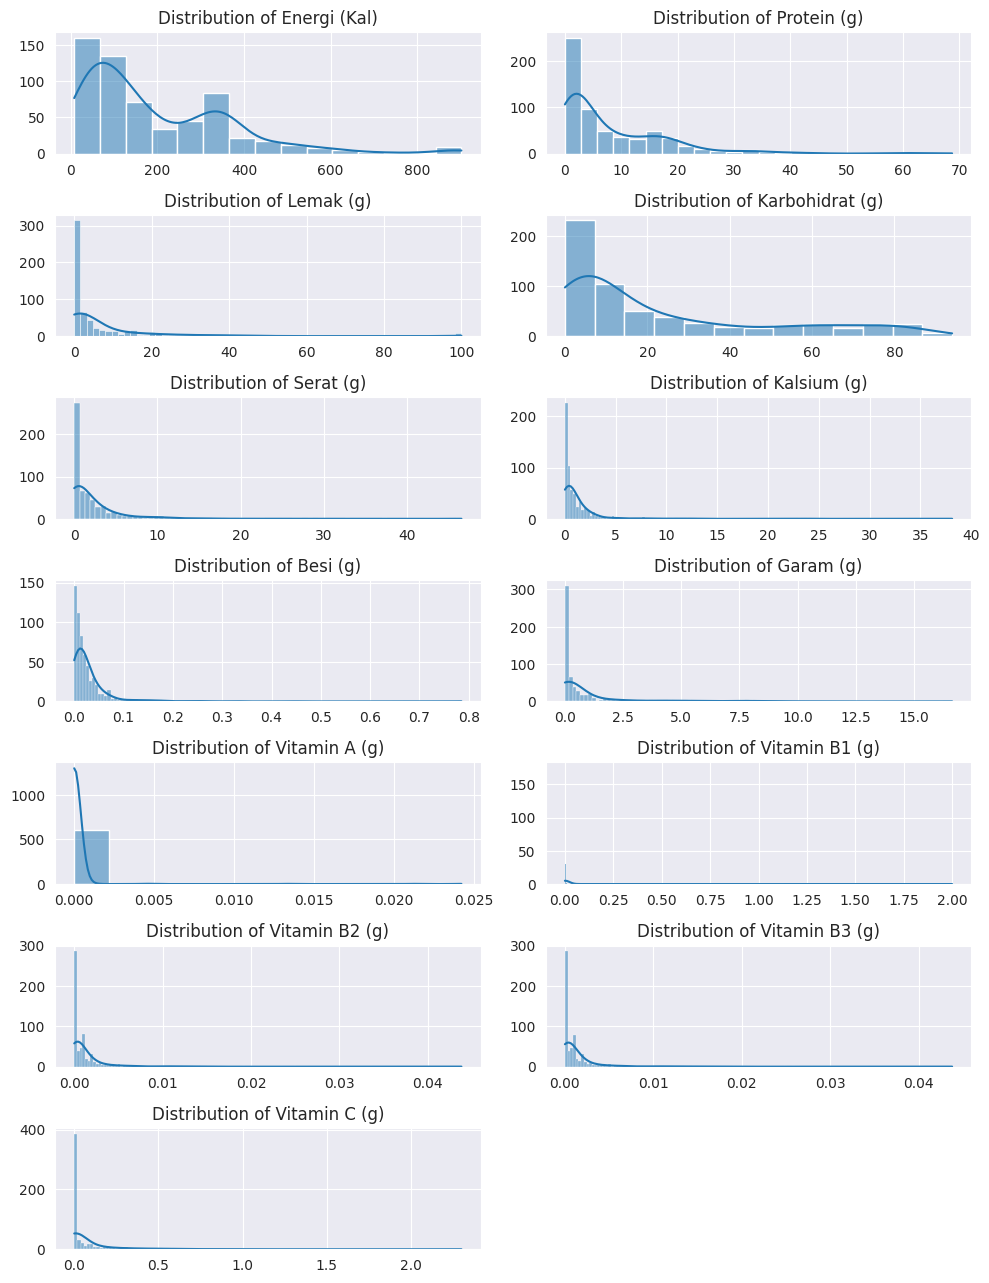

In [11]:
# identify numerical columns
numerical_columns = raw_df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10, 20))
for idx, col in enumerate(numerical_columns):
    plt.subplot(11, 2, idx + 1)
    sns.histplot(raw_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

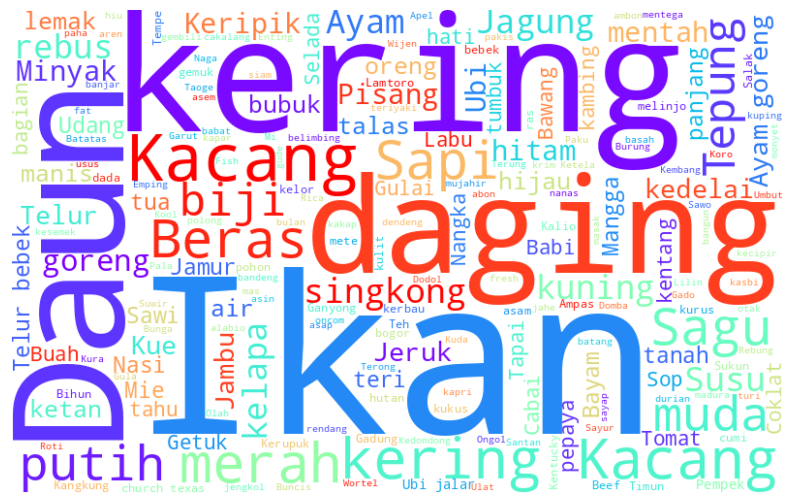

In [12]:
# wordcloud
text = " ".join(raw_df["Nama Pangan"])

wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    background_color="white",
    colormap="rainbow",
    stopwords=STOPWORDS,
).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Bivariate Analysis

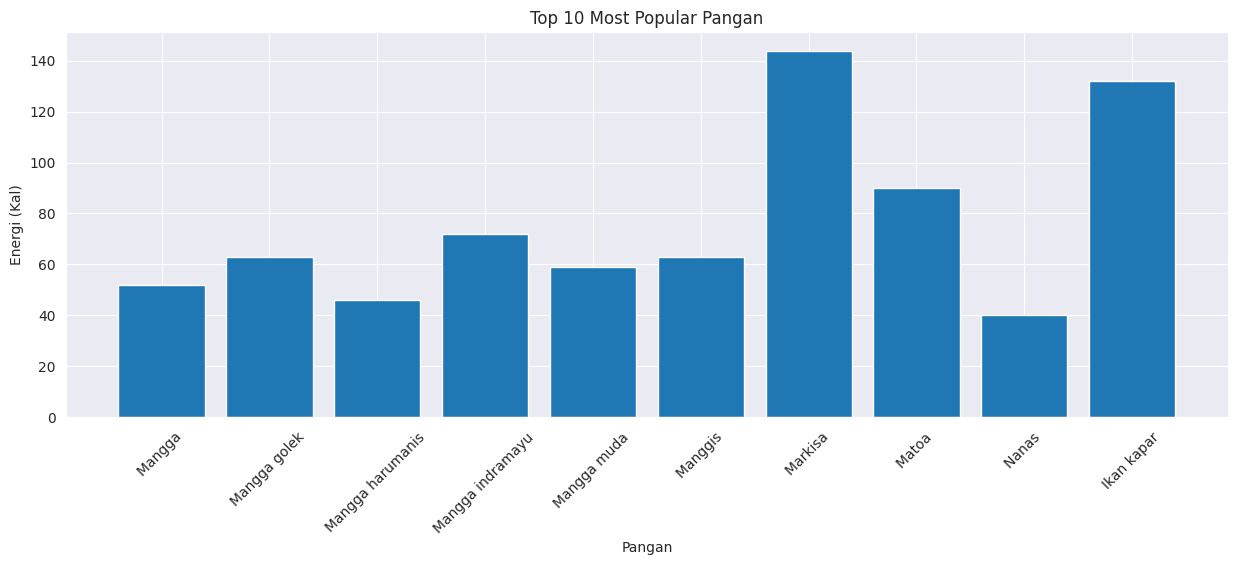

In [13]:
top_names = raw_df["Nama Pangan"].value_counts().nlargest(10).index
df_top_names = raw_df[raw_df["Nama Pangan"].isin(top_names)]

def plot_bar(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15, 5))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

plot_bar(
    df_top_names["Nama Pangan"],
    df_top_names["Energi (Kal)"],
    "Top 10 Most Popular Pangan",
    "Pangan",
    "Energi (Kal)",
)

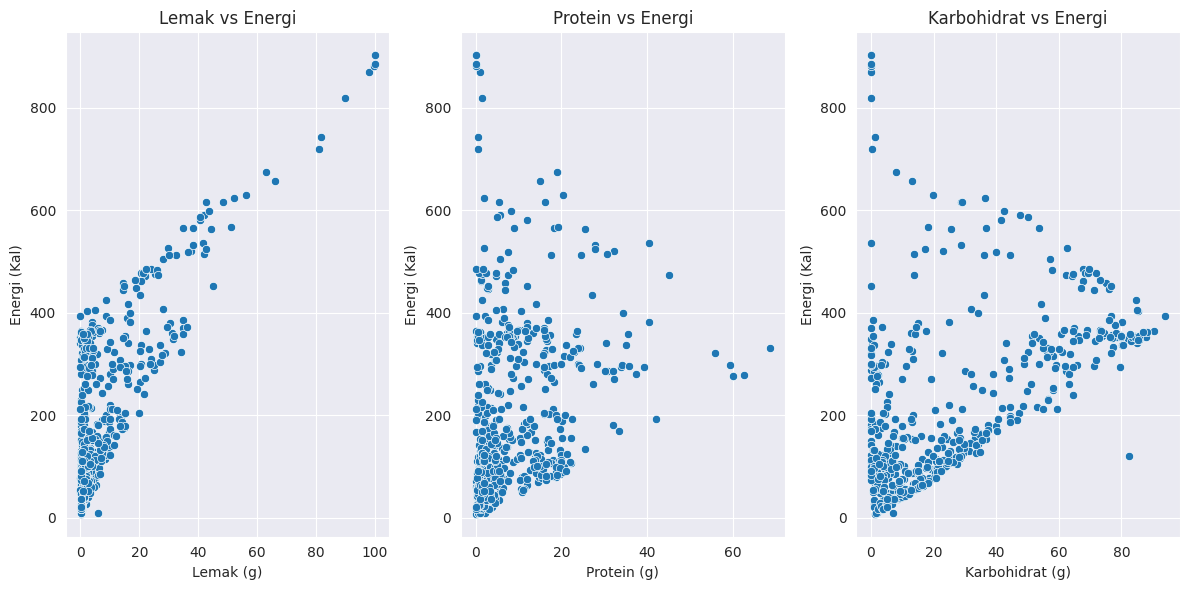

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Lemak (g)', y='Energi (Kal)', data=raw_df)
plt.title('Lemak vs Energi')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Protein (g)', y='Energi (Kal)', data=raw_df)
plt.title('Protein vs Energi')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Karbohidrat (g)', y='Energi (Kal)', data=raw_df)
plt.title('Karbohidrat vs Energi')

plt.tight_layout()
plt.show()

#### Multivariate Analysis

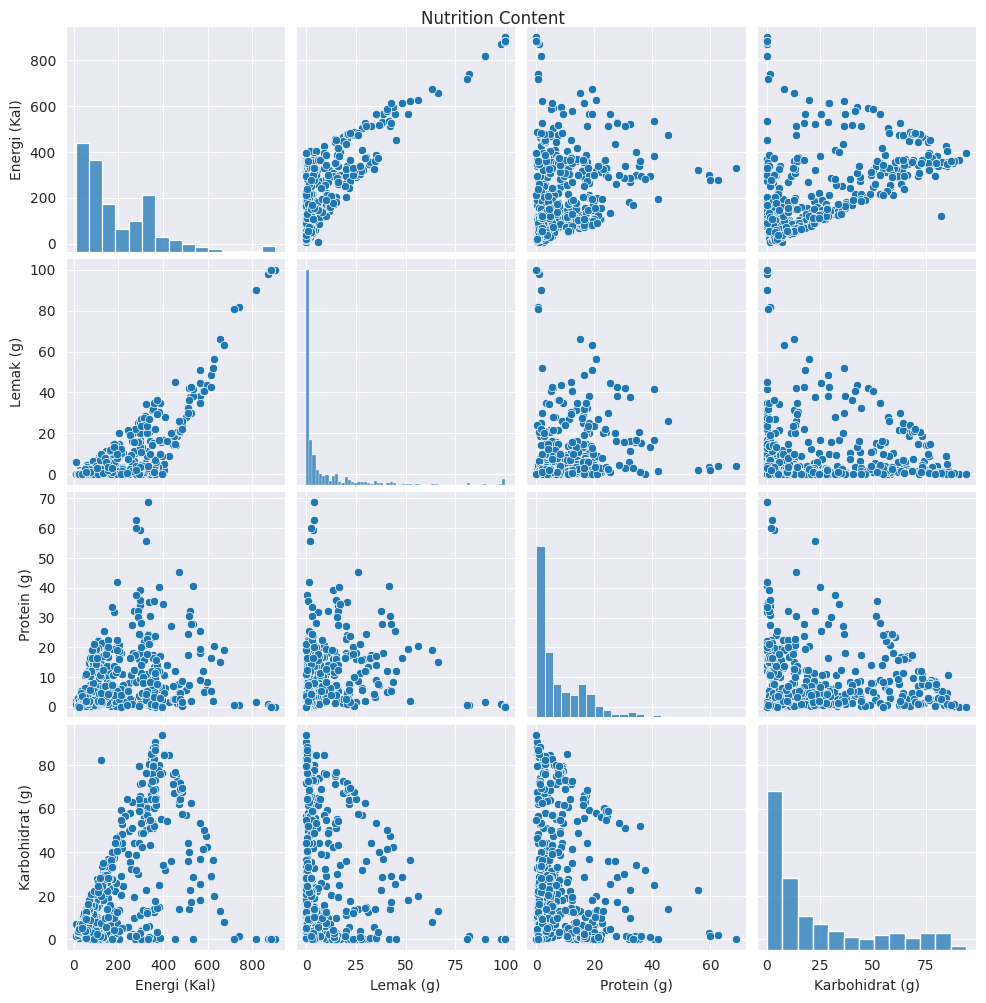

In [15]:
multivariate_data = raw_df[
    [
        "Energi (Kal)",
        "Lemak (g)",
        "Protein (g)",
        "Karbohidrat (g)",
    ]
]

sns.pairplot(multivariate_data)
plt.suptitle("Nutrition Content", y=1.0)
plt.show()

### Handle Outliers

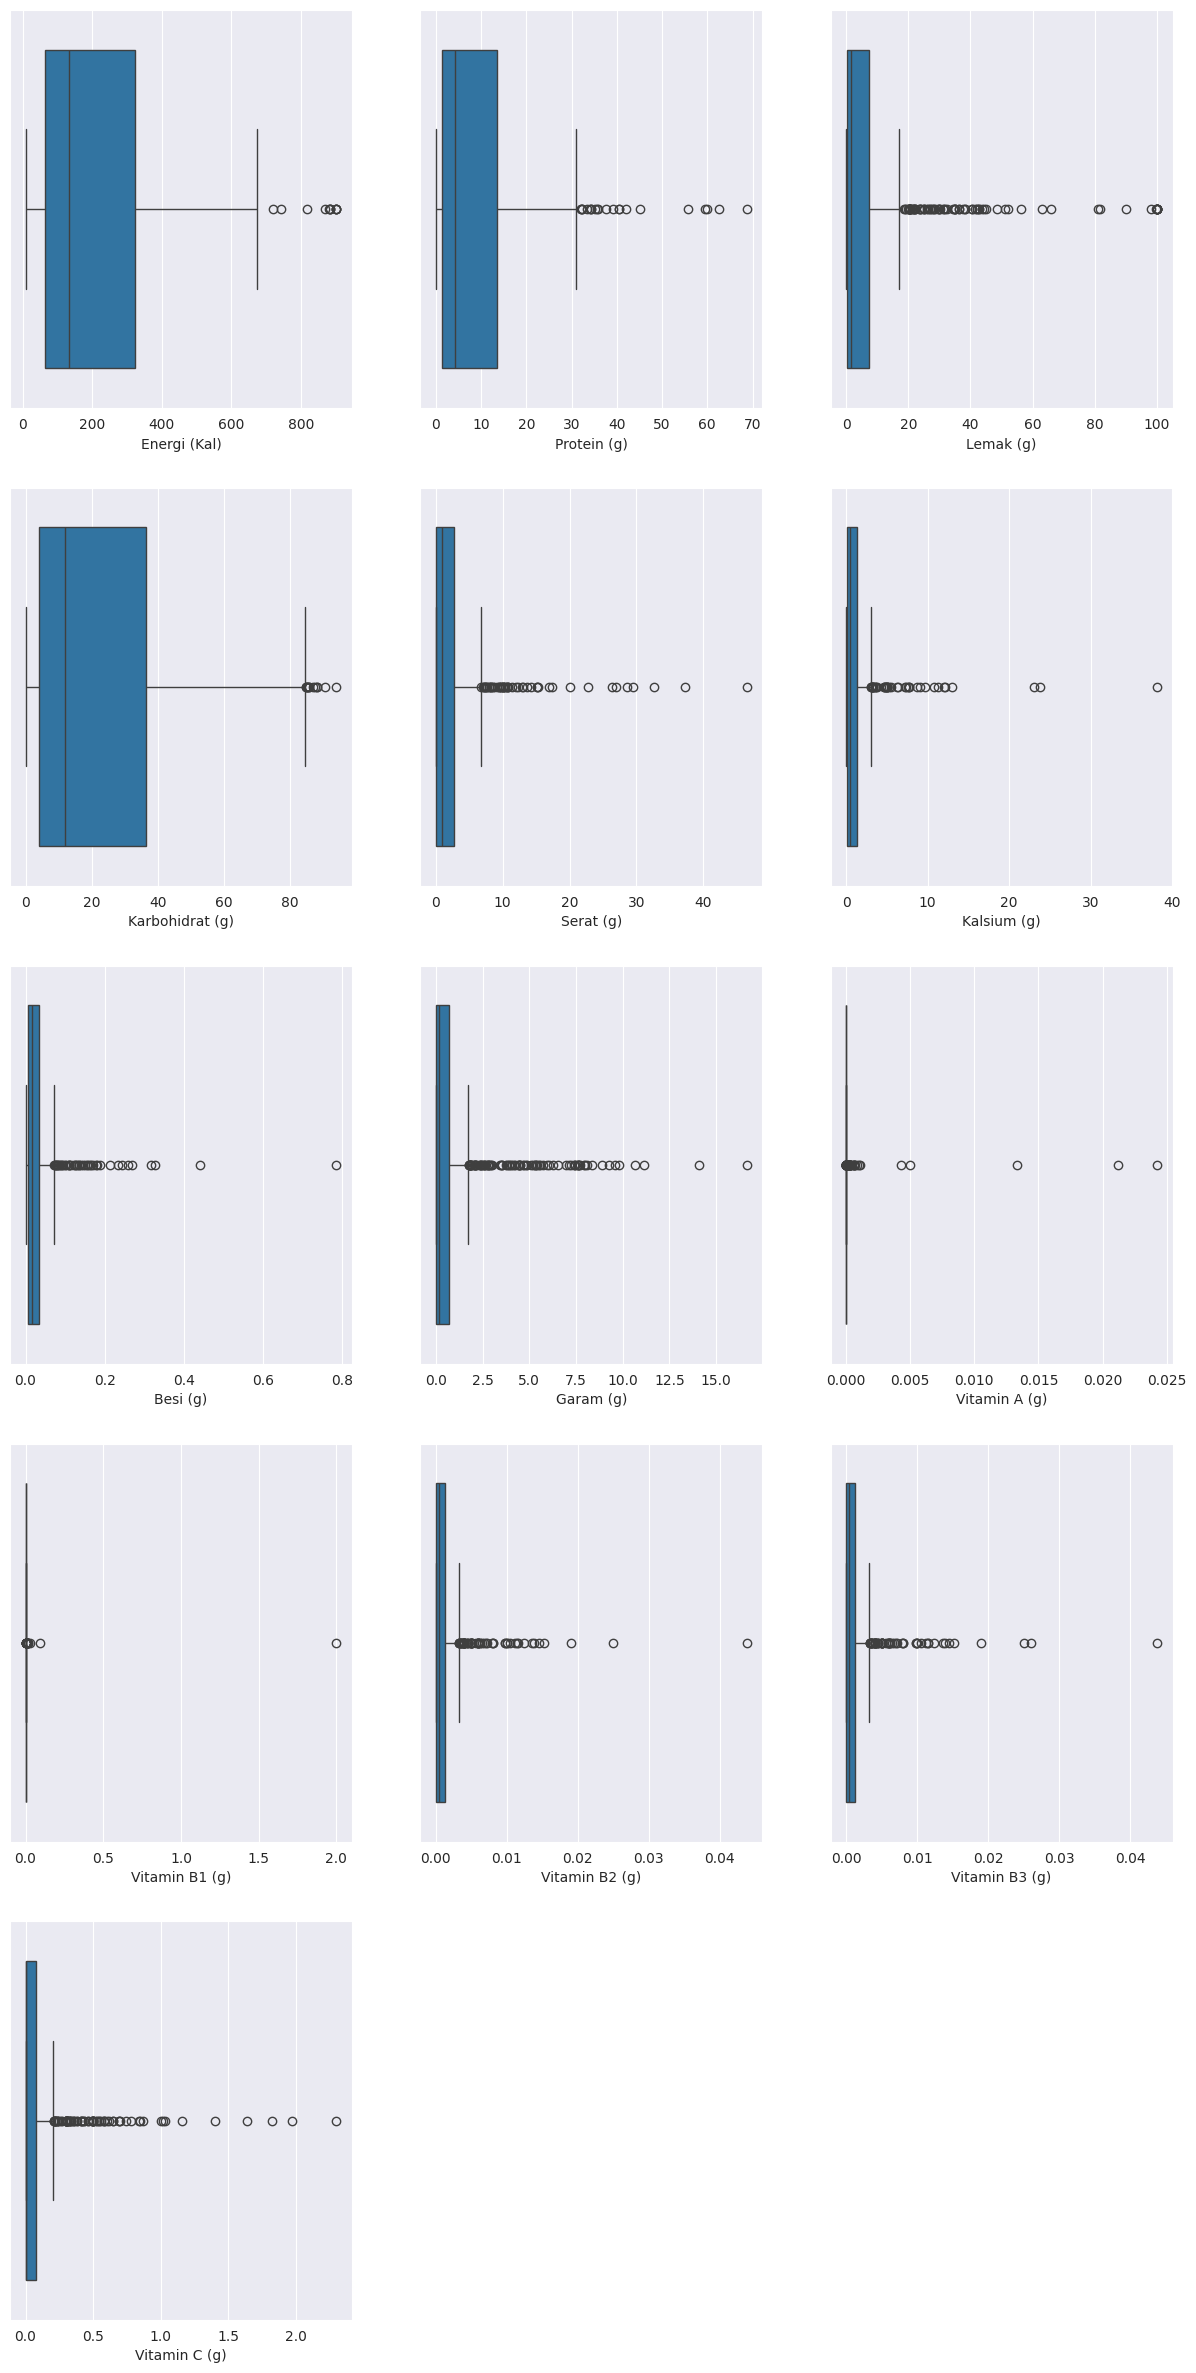

In [16]:
columns = [
    "Energi (Kal)",
    "Protein (g)",
    "Lemak (g)",
    "Karbohidrat (g)",
    "Serat (g)",
    "Kalsium (g)",
    "Besi (g)",
    "Garam (g)",
    "Vitamin A (g)",
    "Vitamin B1 (g)",
    "Vitamin B2 (g)",
    "Vitamin B3 (g)",
    "Vitamin C (g)",
]

fig, axes = plt.subplots(5, 3, figsize=(15, 30))

# check outliers
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        sns.boxplot(x=columns[i], data=raw_df, ax=ax)
    else:
        ax.axis("off")

plt.show()

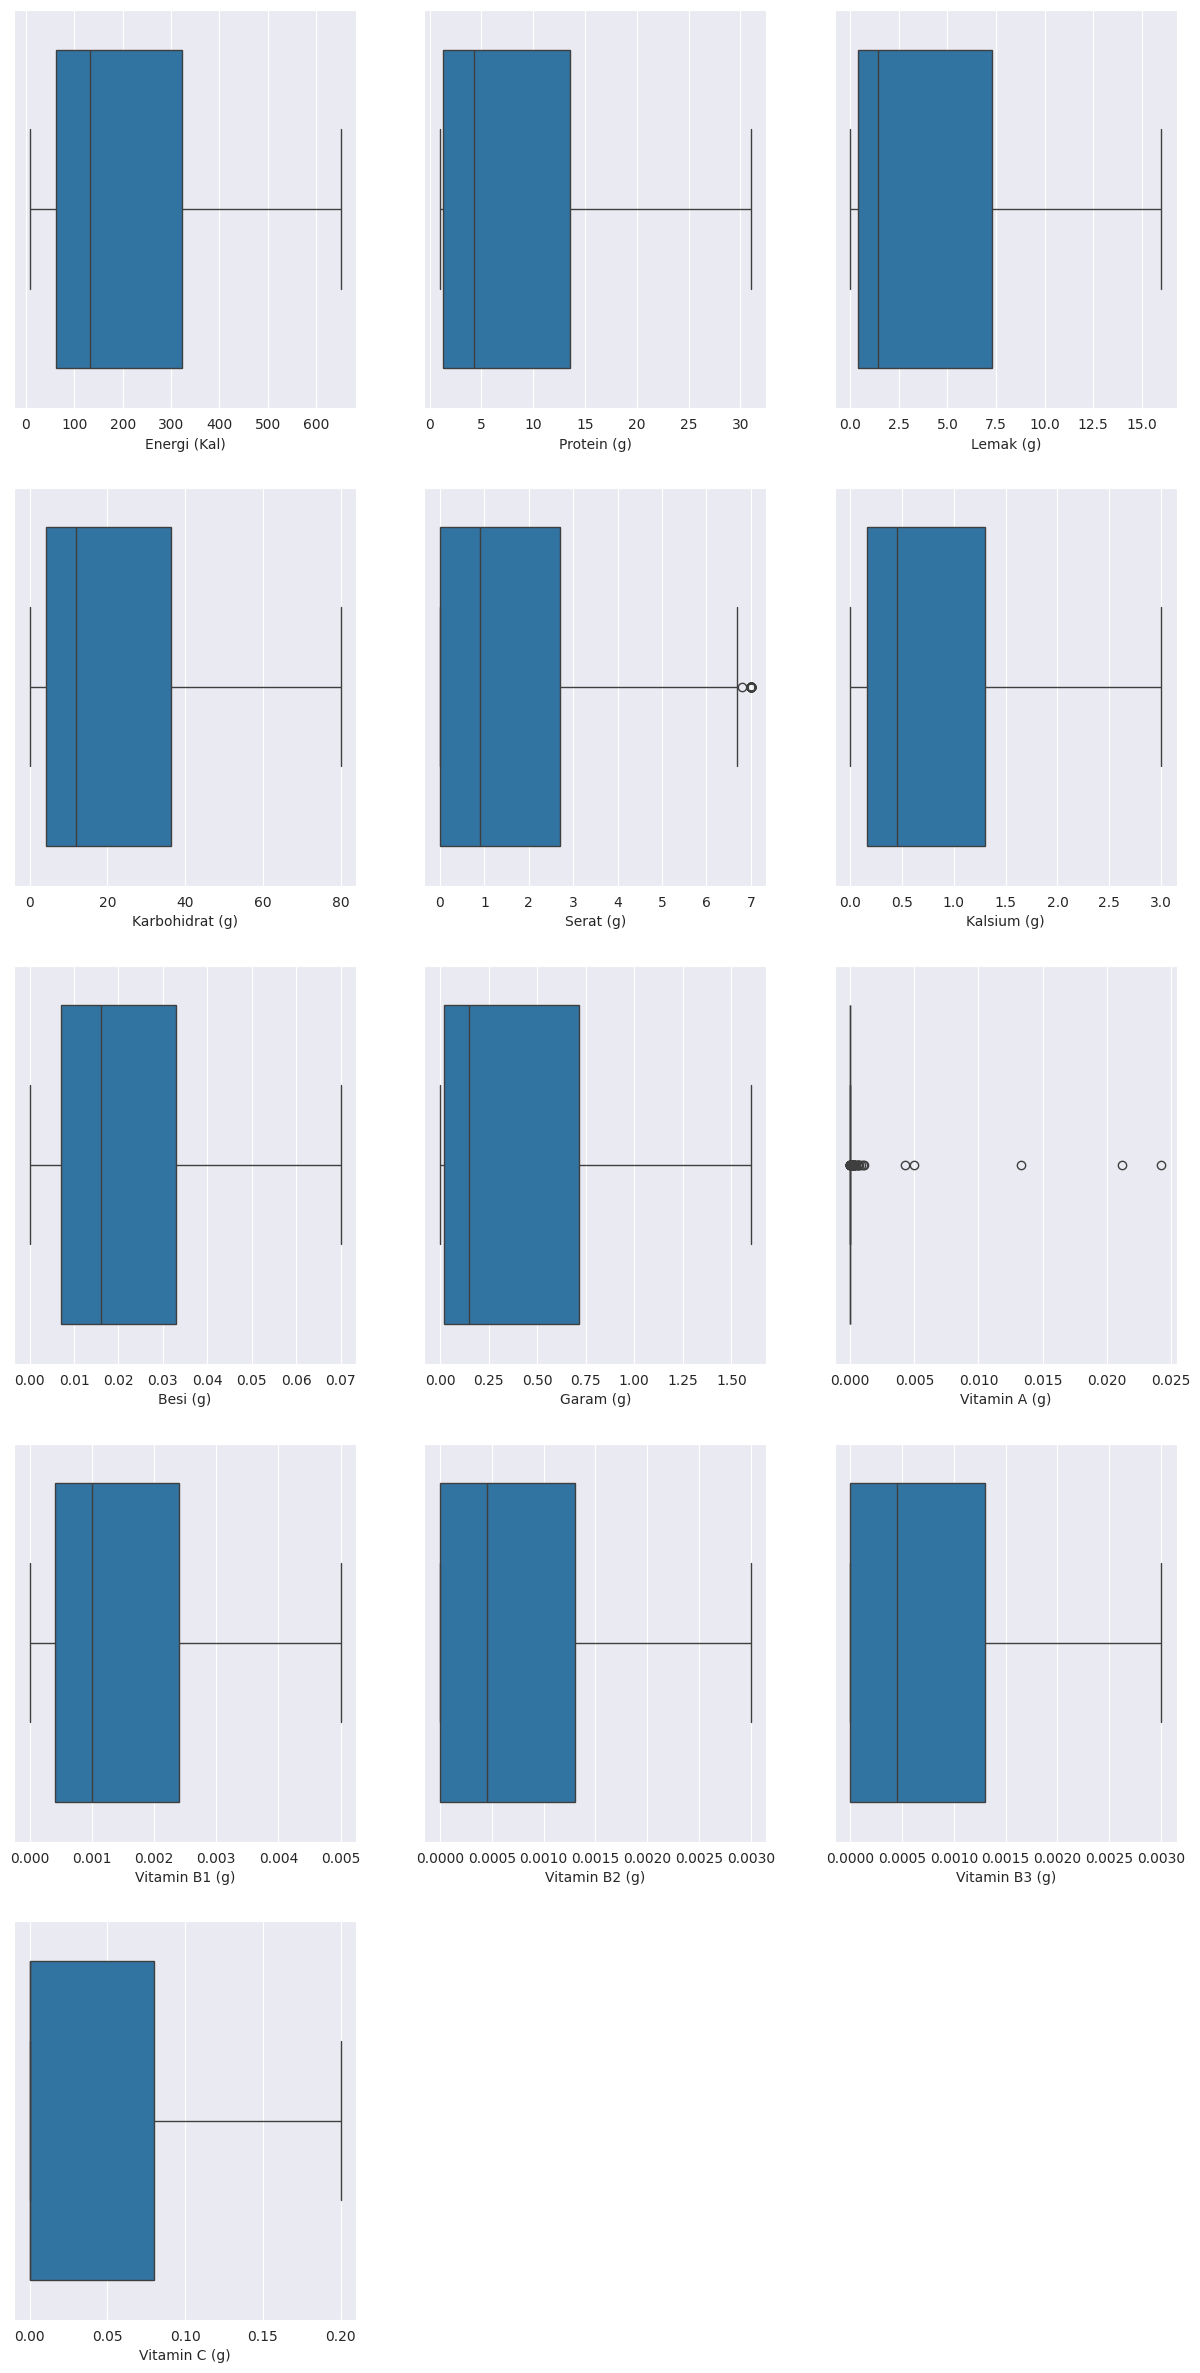

In [17]:
# handle outliers using clip
raw_df["Energi (Kal)"] = raw_df["Energi (Kal)"].clip(1, 650)
raw_df["Protein (g)"] = raw_df["Protein (g)"].clip(1, 31)
raw_df["Lemak (g)"] = raw_df["Lemak (g)"].clip(0, 16)
raw_df["Karbohidrat (g)"] = raw_df["Karbohidrat (g)"].clip(0, 80)
raw_df["Serat (g)"] = raw_df["Serat (g)"].clip(0, 7)
raw_df["Kalsium (g)"] = raw_df["Kalsium (g)"].clip(0, 3)
raw_df["Besi (g)"] = raw_df["Besi (g)"].clip(0, 0.07)
raw_df["Garam (g)"] = raw_df["Garam (g)"].clip(0, 1.6)
raw_df["Vitamin A (g)"] = raw_df["Vitamin A (g)"].clip(0, 0.1)
raw_df["Vitamin B1 (g)"] = raw_df["Vitamin B1 (g)"].clip(0, 0.005)
raw_df["Vitamin B2 (g)"] = raw_df["Vitamin B2 (g)"].clip(0, 0.003)
raw_df["Vitamin B3 (g)"] = raw_df["Vitamin B3 (g)"].clip(0, 0.003)
raw_df["Vitamin C (g)"] = raw_df["Vitamin C (g)"].clip(0, 0.20)

# raw_df.info()
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

# check outliers
for i, ax in enumerate(axes.flat):
    if i < len(columns):
        sns.boxplot(x=columns[i], data=raw_df, ax=ax)
    else:
        ax.axis("off")

plt.show()

### Data Embeddings

In [18]:
cleaned_df = raw_df.copy()
cleaned_df.head()

,Nama Pangan,Energi (Kal),Protein (g),Lemak (g),Karbohidrat (g),Serat (g),Kalsium (g),Besi (g),Garam (g),Vitamin A (g),Vitamin B1 (g),Vitamin B2 (g),Vitamin B3 (g),Vitamin C (g)
0,Nasi,180,3.0,0.3,39.8,0.2,0.25,0.004,0.01,0.0,0.0005,0.001,0.003,0.0
1,Tapai beras,99,1.7,0.3,22.4,0.0,0.04,0.000,0.26,0.0,0.0000,0.000,0.000,0.0
2,Tepung beras mentah,353,7.0,0.5,80.0,2.4,0.05,0.008,0.05,0.0,0.0012,0.001,0.001,0.0
3,Nasi beras merah,149,2.8,0.4,32.5,0.3,0.06,0.008,0.05,0.0,0.0006,0.000,0.000,0.0
4,Bihun mentah,348,4.7,0.1,80.0,1.2,0.06,0.018,0.12,0.0,0.0000,0.000,0.000,0.0


In [19]:
catcol = []
numcol = []

for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)
        
print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol) 

Categorical Columns: ['Nama Pangan']
Numerical Columns: ['Energi (Kal)', 'Protein (g)', 'Lemak (g)', 'Karbohidrat (g)', 'Serat (g)', 'Kalsium (g)', 'Besi (g)', 'Garam (g)', 'Vitamin A (g)', 'Vitamin B1 (g)', 'Vitamin B2 (g)', 'Vitamin B3 (g)', 'Vitamin C (g)']


In [20]:
# sentence transform
model = SentenceTransformer('all-MiniLM-L6-v2')
cleaned_df['NamaPangan_Emb'] = cleaned_df['Nama Pangan'].apply(lambda x: model.encode(x))
cleaned_df.head()

,Nama Pangan,Energi (Kal),Protein (g),Lemak (g),Karbohidrat (g),Serat (g),Kalsium (g),Besi (g),Garam (g),Vitamin A (g),Vitamin B1 (g),Vitamin B2 (g),Vitamin B3 (g),Vitamin C (g),NamaPangan_Emb
0,Nasi,180,3.0,0.3,39.8,0.2,0.25,0.004,0.01,0.0,0.0005,0.001,0.003,0.0,"[-0.057638198, 0.041320097, 0.009404545, -0.00..."
1,Tapai beras,99,1.7,0.3,22.4,0.0,0.04,0.000,0.26,0.0,0.0000,0.000,0.000,0.0,"[-0.03319419, 0.0042385245, -0.035637107, 0.00..."
2,Tepung beras mentah,353,7.0,0.5,80.0,2.4,0.05,0.008,0.05,0.0,0.0012,0.001,0.001,0.0,"[0.003566146, 0.09865964, -0.02396894, 0.00403..."
3,Nasi beras merah,149,2.8,0.4,32.5,0.3,0.06,0.008,0.05,0.0,0.0006,0.000,0.000,0.0,"[0.021587633, 0.103460856, -0.0019708127, 0.01..."
4,Bihun mentah,348,4.7,0.1,80.0,1.2,0.06,0.018,0.12,0.0,0.0000,0.000,0.000,0.0,"[0.03806884, 0.11251526, -0.073147334, 0.00744..."


In [21]:
cleaned_df.to_csv('Food-nutrition-emb.csv', index=False)

### Correlation

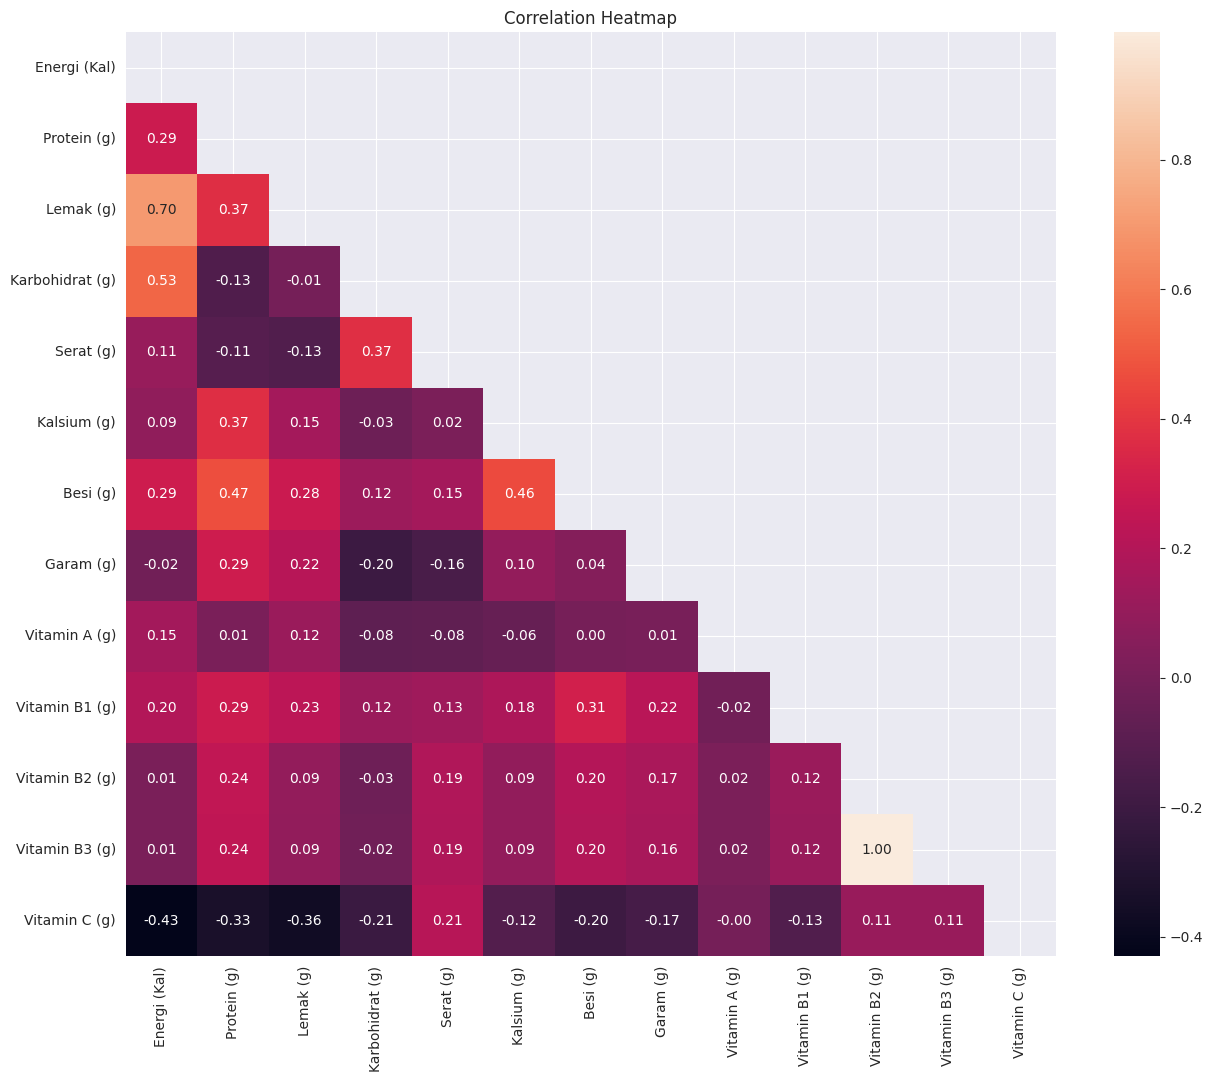

In [22]:
corr = cleaned_df[numcol].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()